# Scipy Stats Jupter notebook

#### Scipy stats is a module contained within the scipy python package. This sub package is used to carry out statistical analysis of datasets in a quick and easy to use manner. This module consists of a library of ever growing statistical tests and functions, probability distributions, kernal density estimation and much more [1]. Due to the large size of this library it would be very difficult to describe each function within it and so I am going to run through a few of the features of the scipy.stats module below.

In [41]:
# I will start first by importing all the necessary packages to describe the features
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#### The first feature of she scipy.stats package I am going to describe is the probability distributions. In scipy.stats these are separated into three headings. These are Continuous distributions, Multivariate distributions and Discrete Distributions.

#### The one I will be looking at is a uniform distribution. This type of distribution is one in which each value within a certain range is equally likely to occur.



In [42]:
# I will start by generating 10,000 numbers from a uniform distribution
uniform= stats.uniform.rvs(size= 10000, loc= 0, scale= 10)

<AxesSubplot:ylabel='Density'>

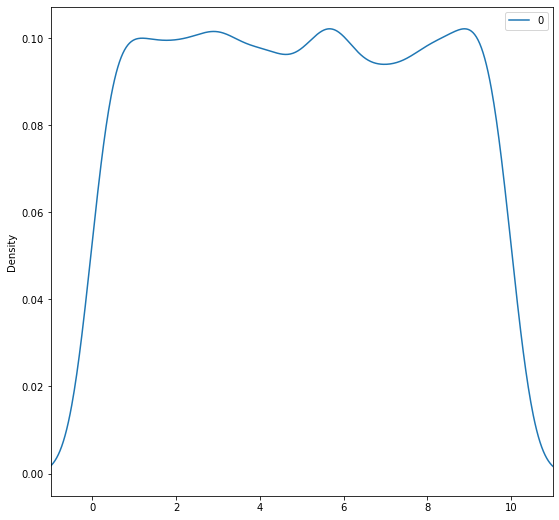

In [44]:
# I will now place them in a pandas dataframe
pd.DataFrame(uniform).plot(kind="density", figsize= (9,9), xlim= (-1,11))

#### I will now be looking at the cumalative distribution function in regards to the uniform distribution. This function allows us to determine whether an observation falls below a specified value. In the below function this specified value is x.

In [46]:
# I use x= 2.5 as the cut off value and expect an answer of 0.25 or 25% as it should be a quarter of the scale due the uniform
# distribution
stats.uniform.cdf(x= 2.5, loc= 0, scale= 10)

0.25

#### I will now be looking at the percent point function in regards to the uniform distribution. This function is the inverse of the CDF function and returns the cut-off for which we have a certain percentage chance for drawing an observation below that value. The percentage example I will use here is 75%

In [47]:
stats.uniform.ppf(q= 0.75, loc= 0, scale=10)

7.5

#### The final function associated with the uniform distribution I will look at is the Probability Density Function (PDF). The PDF gives the probability density otherwise known as the height of the distribution at a given x value. Due to the fact that the Uniform Distribution is flat, all x values within its range will have the same value

In [49]:
# The below for loop will print the densitys between -1 and 11 
for x in range (-1, 12, 2):
    print("Density at x value " + str(x))
    print(stats.uniform.pdf(x, loc= 0, scale= 10))


Density at x value -1
0.0
Density at x value 1
0.1
Density at x value 3
0.1
Density at x value 5
0.1
Density at x value 7
0.1
Density at x value 9
0.1
Density at x value 11
0.0


#### The second feature of the scipy.stats library I will be looking at is the Statistical Funtions. Scipy.stats offer a large variety of statistical functions that can be carried out on datasets all of which can be seen at https://docs.scipy.org/doc/scipy/reference/stats.html#summary-statistics.

In [68]:
# The first statistical function will look at is the find_repeats function
stats.find_repeats([1,2,3,4,4,4,4,3,2,1,2,3,57,6])

RepeatedResults(values=array([1., 2., 3., 4.]), counts=array([2, 3, 3, 4], dtype=int64))

#### The above function will find the number of repeats in an array and return two arrays. The first will show the numbers that repeated and the second will show the number of repeats in the same order.

In [69]:
# The second statistical function I will look at is the describe function.
# I will start by generating a numpy array of 20 numbers
x= np.arange(20)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [70]:
# I will then call the .describe function
stats.describe(x)

DescribeResult(nobs=20, minmax=(0, 19), mean=9.5, variance=35.0, skewness=0.0, kurtosis=-1.206015037593985)

#### The above function will return the nobs, which is the size of the array, the min and max of the array, the mean of the array, the variance, which is a measure of dispersion, the skewness which is the degree of asymmetry in the array and the Kurtosis.

In [71]:
# Another stats function is the tmax.
# I will again create another numpy array of length 20.
x= np.arange(20)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [72]:
# I will now now run the tmax function on the array
stats.tmax(x, 11)

11

#### The above function calculates the max value of the array while ignoring the upperlimit in the above case 11 and anything above it.

## ANOVA

#### Anova stands for analysis of variance and is a method used in statistical analysis to test 3 or more groups for mean differences of continueous response variables [2]. There are two types of ANOVA, these are one-way ANOVA and two-way ANOVA. One-way ANOVA. A one-way ANOVA is used to compare a single dependant variable with a single independant variable also known a a category. A two-way ANOVA is used to compare a single dependant variable with 2 and more independant variables.

***
### One-way ANOVA




#### In order to carry out a one-way ANOVA there are 6 assumptions that must be met in order to ensure that the data is suitable for this type of test. The 6 assumptions are:

#### 1) The dependant variable must be measured at the interval level meaning they are continueous.
#### 2) The independant variable must conpose of more than 1 groups.
#### 3) There should be 'independance of observations' which means that the observations should not be related to the group or      there should be no relationship between the groups.
#### 4) There should be no outliers. This is data that deviates greatly from the mean and do not follow any particular pattern.
#### 5) The dependant variable must be 'normally distributed' for each category of the independant variable. We will use a Shapiro-Wilk to test for this.
#### 6) There most be homogeneity of variances. This can be determined by carrying out the Levenes test for homogeneity of variance. [3] 

In [3]:
# I start by importing the necessary python packages to carry out the One-way ANOVA.
%matplotlib inline
import pandas as pd

# I then load the dataset I will be using to demonstrate the ANOVA method.
df = pd.read_csv("data/Diet.csv")
df
# I will now change the Diet column to a string to make it easier to use later.


,Person,gender,Age,Height,preweight,Diet,weight6weeks,weightloss6weeks
0,25,1,41,171,60,2,60.0,0.0
1,26,1,32,174,103,2,103.0,0.0
2,1,0,22,159,58,1,54.2,3.8
3,2,0,46,192,60,1,54.0,6.0
4,3,0,55,170,64,1,63.3,0.7
...,...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2,2.8
74,75,1,49,177,84,3,79.9,4.1
75,76,1,28,164,85,3,79.7,5.3
76,77,1,40,167,87,3,77.8,9.2


#### The above dataset is an analysis of the results that people obtain after a period of 6 weeks on 3 different types of diet. This dataset fufills the necessary requirements outlined in the first four assumptions of the one-way ANOVA test. For the above dataset I am going to use one-way ANOVA to determine which diet was better for weightloss. In this instance the dependant variable is the weightloss6weeks and the independant variable is the Diet. I now determine whether the above data is suitable for a one-way ANOVA based on assumption 4. I will determine whether or not there are any outliers in the variable I will be investigating. I will do this using a boxplot.

In [4]:
# I first select the column I will be working it and give it the variable name 'dependant'.
dependant = df["weightloss6weeks"]
independant = df["Diet"].astype('category')

# I will now change the Diet column to a category to allow me to show the boxplot below for all 3 diets



C:\Users\Owner\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


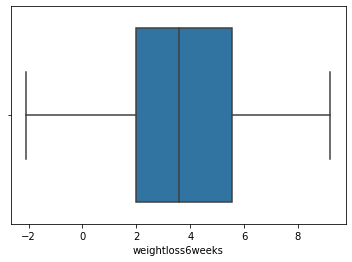

In [5]:
# I will then import seaborn in order to generate a boxplot.
import seaborn as sns
# I call the command to generate the boxplot.
sns.boxplot(dependant)

#### As can be seen from the above boxplot, there are no outliers within the dependant variable weightloss6weeks. I will now separate the weightloss6weeks into the 3 diet groups to check for outliers.

C:\Users\Owner\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


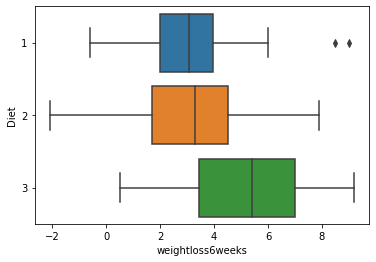

In [6]:
# This time I will plot both the dependant and independant variables. This should produce 3 boxplot, each one representing
# a diet
sns.boxplot(dependant, independant);

#### As can be seen from the above plot there are two outliers in relation to diet 1. Due to the nature of this dataset it is likely that these outliers are genuine as there are much more factors involved in weightloss that vary between individuals then only the factors explored in this dataset for example food intolerances, individuals metabolism and activity level.

#### The next thing I am going to do is check for assumption 5 being present in the dataset. In order to do this I will run a Shapiro-Wilk to ensure that my dependant variable weightloss6weeks is normally distributed. Prior to doing this I will plot a distribution plot again using the seaborn library to get a visual idea as to whether or not the depentant variable is of normal distribution.

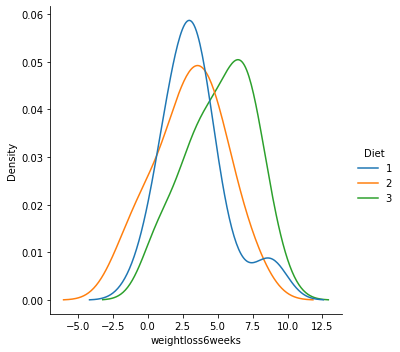

In [7]:
sns.displot(x=dependant, hue=independant, kind="kde")

In [8]:
# I can now carry out the Shapiro-Wilk test on the data to verify the dependant variable is normally distributed.
import scipy.stats as ss

In [9]:
#I'll first need to seperate the weightloss6weeks data into groups based on the diet
wtl_len_one = dependant[independant ==1]
wtl_len_two = dependant[independant == 2]
wtl_len_three = dependant[independant == 3]

In [10]:
# I can now run the Shaprio-Wilk test on these three pieces of data.

ss.shapiro(wtl_len_one)

(0.9255314469337463, 0.07748671621084213)

In [11]:
ss.shapiro(wtl_len_two)

(0.9855913519859314, 0.961176335811615)

In [12]:
ss.shapiro(wtl_len_three)

(0.9601252675056458, 0.37203603982925415)

##### Due to the size of the p-value (the second value) seen above. I can conclude that the dependant variable is normally distributed. If the p-value was less than 0.05 the dependant value would not be normally distributed [4].

***
#### The next thing I now need to do is check for homogenity of variance. I will do this using the Levenes test.

In [13]:
ss.levene(wtl_len_one,wtl_len_two, wtl_len_three )

LeveneResult(statistic=0.6256665777896286, pvalue=0.5376731304274011)

#### Seeing as the above p-value is greater than 0.05 this indicates that there is homogenity of variance among the data.

***
#### All assumption have been met and I have determined that this dataset is suitable to carry out a one-way ANOVA.

In [14]:
ss.f_oneway(wtl_len_one,wtl_len_two, wtl_len_three )

F_onewayResult(statistic=6.1974474531653545, pvalue=0.0032290142385893524)

#### A p-value here of less than 0.05 means that there is a 'significant difference between our group mean'. Based on this I have enough evidence to reject the null hypthosis, this being that weightloss is not linked to any of the particular diets.

***
#### I will now use a tukey post hoc test in order to determine which group has the greatest variability out of the three groups.

In [15]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey= pairwise_tukeyhsd(endog = dependant, groups = independant, alpha = 0.05)

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-0.2741,0.9,-1.8806,1.3325,False
1,3,1.8481,0.0201,0.2416,3.4547,True
2,3,2.1222,0.0048,0.5636,3.6808,True


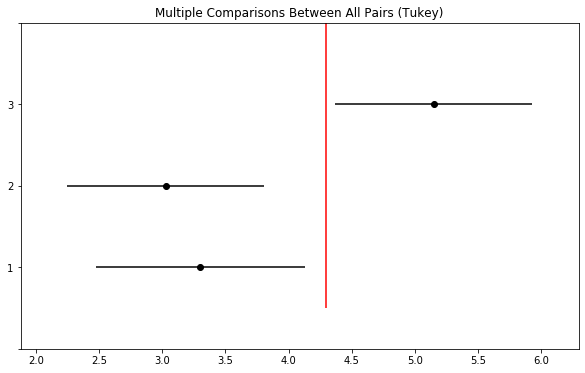

In [16]:
import matplotlib.pyplot as plt
tukey.plot_simultaneous()
plt.vlines(x=4.3, ymin =-0.5,ymax=4.5, color = "red")
tukey.summary()

#### As can be seen from the above Tukey posthoc test it can be seen that there are now statistically significant differences between Diet 1 and Diet 2 and thus from the summary table above I am advised to not reject the null hypothesis. There is however significant differences between diet 1 and diet 2 and also between diet 1 and diet 3 and thus the generated table advises that I should reject the null hypothesis based on the p-value as seen in column 4.

***
### Two-way ANOVA

#### Two or more independant variables with a single dependant variable. For this example the independant variables I have chosen will be diet, age and gender. From the previous tests we have already determined that the Diet dataset is suitable to perform an ANOVA.

In [17]:
# I start by importing the statmodels.api package.
import statsmodels.api as sm
# I then import the ols package from statsmodels.formula.api.
from statsmodels.formula.api import ols

In [34]:
# Now I create the model variable that I will use as an argument for the two-way ANOVA function.
# For the below example I will be looking at Age and preweight to see if they are related to weightloss6weeks
model= ols('weightloss6weeks ~ Age +preweight + Age*preweight', data = df).fit()
sm.stats.anova_lm(model, typ= 2)


,sum_sq,df,F,PR(>F)
Age,1.665035,1.0,0.265652,0.607800
preweight,2.192316,1.0,0.349779,0.556041
Age:preweight,33.580210,1.0,5.357643,0.023408
Residual,463.811294,74.0,NaN,NaN


#### As can be seen from the outcome above the p-values for both Age and preweight  are greater than 0.05 and thus this would show that both these factors on there own do not have a significant effect on the weight loss after 6 weeks. The p-value for the interaction effect (Age:preweight) is less than 0.05. This would mean that there is a significant interaction effect between the samples age and preweight. The interaction effect shows the effect that one variable has on another variable. In the case of this dataset this results would make sense. Generally the older a person is the least active they become and thus end up gaining more weight due to inactivity.

In [45]:
# For the example below I will be looking a three different indepenant variables and how they relate to weightloss6weeks.
model= ols('weightloss6weeks ~ Diet+gender + Diet*gender', data = df).fit()
sm.stats.anova_lm(model, typ= 2)


,sum_sq,df,F,PR(>F)
Diet,45.934178,1.0,7.738665,0.006853
gender,0.375387,1.0,0.063242,0.802140
Diet:gender,15.876872,1.0,2.674823,0.106194
Residual,439.239714,74.0,NaN,NaN


#### As can be seen from the outcome above the p-values for Diet is much less than 0.05. This was already observed in the one-way ANOVA. The p-value for gender is greater than 0.05 and thus this would show that the independant variable gender is not statistically significant. The p-value for the interaction effect Diet:gender is also greater than 0.05. This would mean that there is no significant interaction effect between the samples gender and diet. 

## Conclusion